In [1]:
# -*- coding: utf-8 -*-
"""
@author: rahul
"""
from statistics import mean
import numpy as np
from numpy import log10 as log10
import pandas as pd
import matplotlib.pyplot as plt
import sys
from numpy.polynomial.polynomial import polyfit

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    
    return m, b
filename = 'NCRB_2009_Table_1.1.csv'
headers =  ['Category (Col. 1)','States/ UTs (Col. 2)','Category of Complaints Received (Col. 3) - Oral','Category of Complaints Received (Col. 4) - Written','Category of Complaints Received (Col. 5) - Distress call over Phone 100','Category of Complaints Received (Col. 6) - Complaints Initiated Suomoto by Police','Category of Complaints Received (Col. 7) - Total Complaints = Col. (3 to 6)','No. of Cases Registered Under (Col. 8) - IPC','No. of Cases Registered Under (Col. 9) - SLL','No. of Cases Registered Under (Col. 10) - Total = Col. (8+9)']

#CREATE SCATTER PLOT

#plot scatter with first column as x values and second column as y values
# take the first 35 readings only which excludes the cumumulative data
data = pd.read_csv(filename, header = 0,usecols =[headers[5],headers[6],headers[8]]) 
x1 = data[headers[5]][0:35]
x2 = data[headers[6]][0:35]
x2 = x2.values - x1.values
y = data[headers[8]][0:35]
lnx1 = log10(x1.values)
lnx2 = log10(x2)
lny = log10(y.values)
m, b = best_fit_slope_and_intercept(lnx1,lny)
regression_line = np.asarray([(m*lnx1_i)+b for lnx1_i in lnx1])
exp_regression = 10**regression_line


m2, b2 = best_fit_slope_and_intercept(lnx2,lny)
regression_line2 = np.asarray([(m2*lnx2_i)+b2 for lnx2_i in lnx2])
exp_regression2 = 10**regression_line2

r1= np.corrcoef(lnx1,lny)
r2= np.corrcoef(lnx2,lny) 

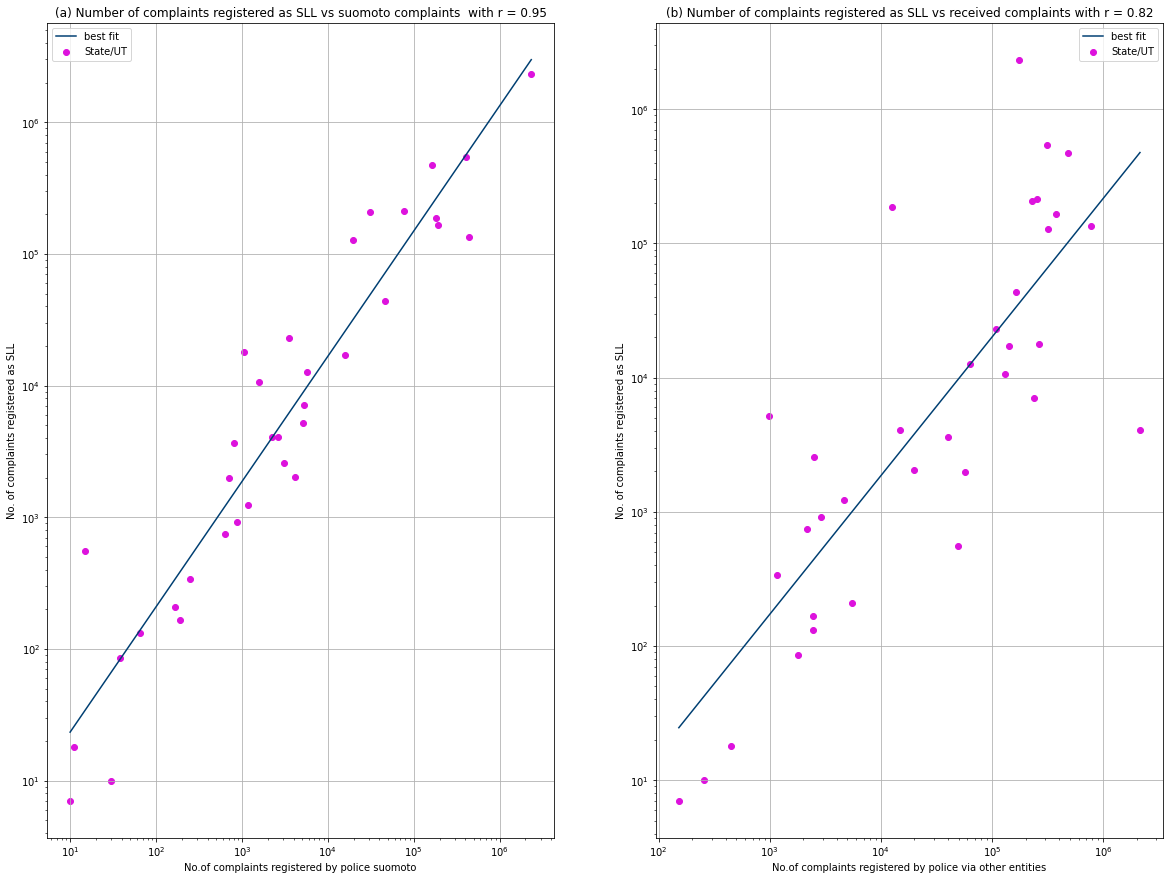

In [2]:
plt.figure(1, figsize = (20,15))
plt.subplot(1,2,1)
plt.scatter(x1,y,color='#dd12dd',label="State/UT")
order = np.argsort(x1)
plt.plot(np.array(x1)[order],np.array(exp_regression)[order],color='#003F72',label="best fit")
#specifying labels
plt.xlabel("No.of complaints registered by police suomoto")
plt.ylabel("No. of complaints registered as SLL")
plt.yscale("log")
plt.xscale("log")
#enable legend
plt.legend()
plt.grid()
plt.title('(a) Number of complaints registered as SLL vs suomoto complaints  with r = %0.2f'% (r1[0,1]))

plt.subplot(1,2,2)
plt.scatter(x2,y,color='#dd12dd',label="State/UT")
order = np.argsort(x2)
plt.plot(np.array(x2)[order],np.array(exp_regression2)[order],color='#003F72',label="best fit")
#specifying labels
plt.xlabel("No.of complaints registered by police via other entities")
plt.ylabel("No. of complaints registered as SLL")
plt.yscale("log")
plt.xscale("log")
#enable legendZ
plt.legend()
plt.grid()
plt.title('(b) Number of complaints registered as SLL vs received complaints with r = %0.2f' %(r2[0,1]))


plt.show()

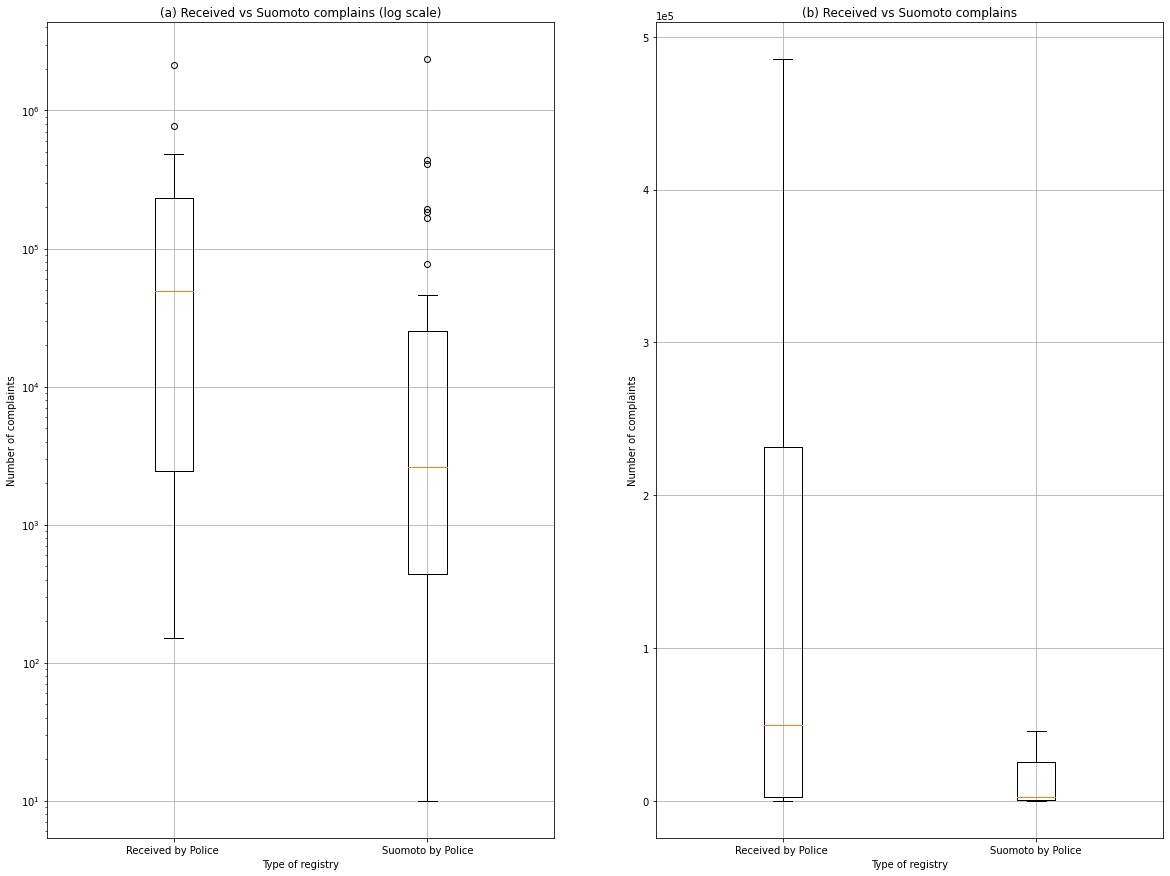

In [3]:
#%% CREATE BOX PLOT

data = pd.read_csv(filename, header = 0,usecols =[headers[2],headers[3],headers[4],headers[5],headers[8]]) 
boxplotdata = []
outside_registered = []
outside_registered = data[headers[2]][0:35].dropna().tolist()
for i in range(3,5):
    list = data[headers[i]][0:35].dropna().tolist()
    for j in range(0, 35): 
        outside_registered[j] = outside_registered[j] + list[j]
boxplotdata.append(outside_registered)
list = data[headers[5]][0:35].dropna().tolist()
boxplotdata.append(list)
#%% plot
    
#plotting


plt.figure(2, figsize = (20,15))


plt.subplot(1,2,1)
plt.boxplot(boxplotdata)

#specifying labels
plt.xticks([1,2],["Received by Police ","Suomoto by Police"])
plt.xlabel("Type of registry")
plt.ylabel("Number of complaints")
plt.yscale("log")
#plt.ylim((1,10**6))
plt.grid()
plt.title('(a) Received vs Suomoto complains (log scale)')


plt.subplot(1,2,2)
plt.boxplot(boxplotdata,0,'')

#specifying labels
plt.xticks([1,2],["Received by Police ","Suomoto by Police"])
plt.xlabel("Type of registry")
plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
plt.ylabel("Number of complaints")
#plt.yscale("l")
#plt.ylim((1,10**6))
plt.grid()
plt.title('(b) Received vs Suomoto complains')

plt.show()

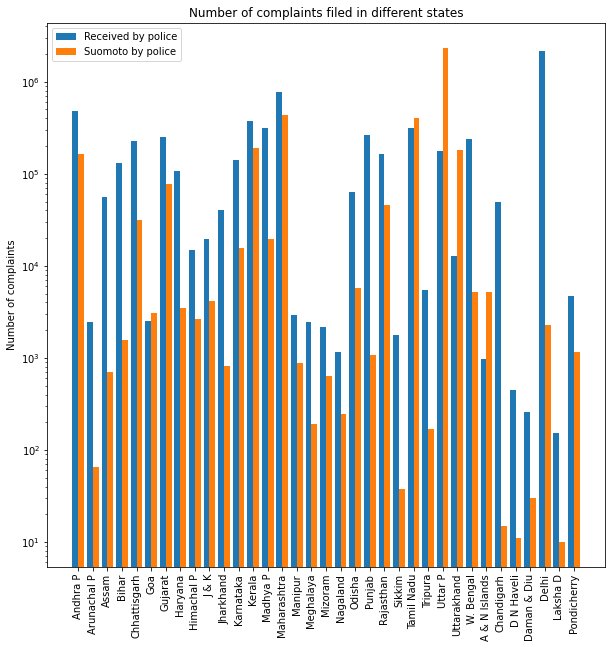

In [15]:
#%% CREATE BAR CHART
data2 = pd.read_csv(filename, header = 0,usecols =[headers[1]])
data = pd.read_csv(filename, header = 0,usecols =[headers[5],headers[6]]) 
total_complaints = data[headers[6]][0:35].values
suomoto_complaints = data[headers[5]][0:35].values
recieved_complaints = total_complaints - suomoto_complaints

log_recieved = log10(recieved_complaints)
log_sunomoto = log10(suomoto_complaints)
#%%

plt.figure(3, figsize = (10,10))
N = 35
width = 0.4
ind = np.arange(N)    # the x locations for the groups
p1 = plt.bar(ind-width/2, recieved_complaints,width)
p2 = plt.bar(ind+width/2, suomoto_complaints,width)
#plt.xlim((-1,36))
x = data2[headers[1]]
plt.xticks(ind,x[:35],rotation=90,fontsize=10)
plt.ylabel('Number of complaints')
plt.yscale('log')
plt.title('Number of complaints filed in different states')
plt.legend((p1[0], p2[0]), ('Received by police', 'Suomoto by police'))
plt.show()
